---

**Подключение библиотек и скриптов**

In [40]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [43]:
# input
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_train_3.csv'
PREPARED_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/train.csv'
SCALER_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_scaler_3.pkl'
MODEL_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_3.pkl' 

### Загрузка данных

In [44]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [45]:
df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [46]:
feature_names = ['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history'
 ]

target_name = 'mean_exam_points'

In [47]:
df = df[feature_names + [target_name]]
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


### Стандартизация признаков

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
feature_names_for_stand = df[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']

In [50]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [51]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [52]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,-0.730774,-1.121140,-0.569875,-0.908202,1.290994,-0.391497,-0.350843,-0.238217,5.491143,-0.140655,61
1,1,0.263815,1.136037,2.192764,1.616335,1.290994,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,76
2,2,-0.855098,-1.121140,-0.950929,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,53
3,3,0.015167,1.700332,-0.569875,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,54
4,4,-0.357803,-0.556846,-0.379348,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655,57


### Сохранение обучающего датасета

In [53]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df[feature_names]
y = df[target_name]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from math import sqrt

In [59]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()
    return None

**Обучение и оценка модели**

In [60]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

R2:	0.55
MAE:	7.944
MSE:	97.071
RMSE:	9.852


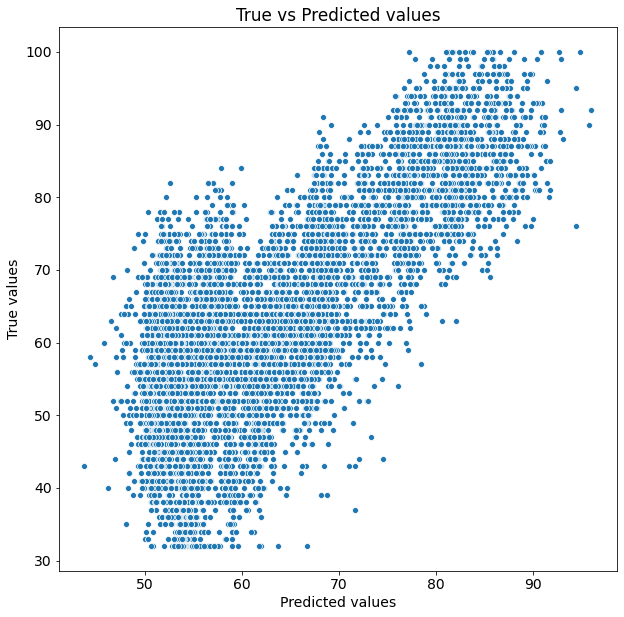

In [61]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.552
MAE:	7.99
MSE:	97.104
RMSE:	9.854


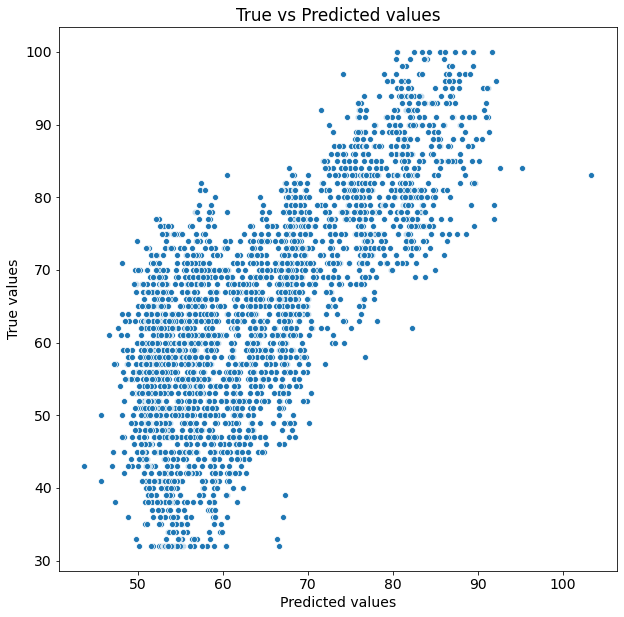

In [62]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Сохранение модели

**Scaler**

In [63]:
SCALER_FILE_PATH

'/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_scaler_3.pkl'

In [64]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [65]:
with open(SCALER_FILE_PATH, "rb") as file:
    new_scaler = pickle.load(file)

**Model**

In [66]:
MODEL_FILE_PATH

'/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_3.pkl'

In [67]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [68]:
Test_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_test_prep.csv'
PREPARED_DATASET_test_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/test.csv'

# output

In [69]:
test = pd.read_csv(PREPARED_DATASET_test_PATH)
test = test[feature_names]
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
stand_test_features = scaler.fit_transform(test)
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
test[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [72]:
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,-0.730774,-1.121140,-0.569875,-0.908202,1.290994,-0.391497,-0.350843,-0.238217,5.491143,-0.140655
1,10001,0.263815,1.136037,2.192764,1.616335,1.290994,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655
2,10002,-0.855098,-1.121140,-0.950929,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655
3,10003,0.015167,1.700332,-0.569875,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655
4,10004,-0.357803,-0.556846,-0.379348,-0.908202,-0.774597,-0.391497,-0.350843,-0.238217,-0.182111,-0.140655


In [73]:
final_preds = final_model.predict(test)
final_preds

array([58.98014952, 87.65350115, 51.2485112 , ..., 57.53459524,
       51.52758916, 53.98069952])

In [74]:
final_preds.shape

(10000,)

In [75]:
predicted_df = pd.DataFrame(final_preds, test['Id'], columns=['mean_exam_points'])
predicted_df.to_csv('predicted_defaults.csv', index_label= 'Id')

In [76]:
predicted_df.head()

,mean_exam_points
Id,
10000,58.980150
10001,87.653501
10002,51.248511
10003,53.638266
10004,53.897896


**Сохраняем полученную модель**

In [77]:
predicted_df.to_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend.csv', index='Id')

In [78]:
f = pd.read_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend.csv')
f.head()

,Id,mean_exam_points
0,10000,58.980150
1,10001,87.653501
2,10002,51.248511
3,10003,53.638266
4,10004,53.897896
